In [8]:
import pandas as pd
zoo_df = pd.read_csv('zoo.csv')
zoo_df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [9]:
zoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [10]:
zoo_df.drop_duplicates(keep=False)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [11]:
import warnings
warnings.filterwarnings('ignore')
import os
import re
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn import preprocessing
from sklearn.datasets import fetch_20newsgroups, load_files
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

label_encoder = LabelEncoder()
categorial_columns = zoo_df.columns[zoo_df.dtypes == 'object'].union(['class_type'])
for column in categorial_columns:
    zoo_df[column] = label_encoder.fit_transform(zoo_df[column])
zoo_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,0
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,0
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,3
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,0
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,0


<AxesSubplot:ylabel='Frequency'>

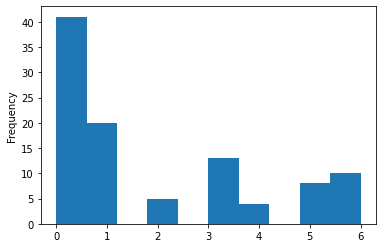

In [12]:
#Оценим сбалансированность выборки
zoo_df['class_type'].plot(kind = 'hist')

In [13]:
zoo_df['legs'] = (zoo_df['legs'] - zoo_df['legs'].min())/(zoo_df['legs'].max() - zoo_df['legs'].min())
zoo_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,0.5,0,0,1,0
1,1,1,0,0,1,0,0,0,1,1,1,0,0,0.5,1,0,1,0
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0.0,1,0,0,3
3,3,1,0,0,1,0,0,1,1,1,1,0,0,0.5,0,0,1,0
4,4,1,0,0,1,0,0,1,1,1,1,0,0,0.5,1,0,1,0


<AxesSubplot:>

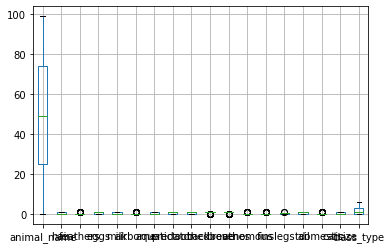

In [14]:
zoo_df.boxplot()

In [140]:
#zoo_df.animal_name.value_counts()
zoo_df = pd.get_dummies(zoo_df, columns = ['animal_name'])

In [141]:
zoo_df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,animal_name_90,animal_name_91,animal_name_92,animal_name_93,animal_name_94,animal_name_95,animal_name_96,animal_name_97,animal_name_98,animal_name_99
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

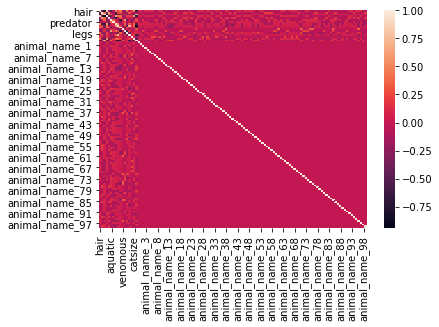

In [142]:
#Оценим корреляцию между признаками 
import seaborn as sns

corr_matrix = zoo_df.corr()

sns.heatmap(corr_matrix)

In [144]:
X = zoo_df.drop('class_type', axis = 1)
y = zoo_df['class_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3, stratify=y)

In [145]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

parameteres = {'leaf_size': range(5, 50, 5),
              'n_neighbors': range(5, 100, 5)}
grid = GridSearchCV(classifier, parameteres, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': range(5, 50, 5),
                         'n_neighbors': range(5, 100, 5)})

In [146]:
grid.best_params_

{'leaf_size': 5, 'n_neighbors': 5}

In [147]:
classifier = KNeighborsClassifier(n_neighbors = 5, leaf_size=5)

classifier.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=5)

In [148]:
from sklearn.metrics import roc_curve, roc_auc_score

classifier_probs = classifier.predict_proba(X_test)

classifier_auc = roc_auc_score(y_test, classifier_probs, multi_class='ovr')

print('KNN: AUROC = %.3f' % (classifier_auc))

KNN: AUROC = 0.993


In [100]:
from sklearn.linear_model import Perceptron
net = Perceptron()
parameteres = {'max_iter': range(10, 200, 5)}
grid = GridSearchCV(net, parameteres, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Perceptron(),
             param_grid={'max_iter': range(10, 200, 5)})

In [101]:
grid.best_params_

{'max_iter': 10}

In [102]:
net = Perceptron(max_iter = 10, verbose = 0, random_state = None, fit_intercept = True, eta0 = 0.001,
                penalty = 'l2', alpha = 0.03)
net.fit(X_train, y_train)

Perceptron(alpha=0.03, eta0=0.001, max_iter=10, penalty='l2', random_state=None)

In [103]:
net.score(X_test, y_test)

0.9523809523809523

In [104]:
net.score(X_train, y_train)

1.0